## Titanic EDA Lab - Week 3

This file contains Exploratory data analysis of the Titanic Data

Analysed By: Sahil Phule

In [14]:
import pandas as panda

## changed as pylab is deprecated
%matplotlib inline

In [15]:
df=panda.read_csv("train.csv")

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

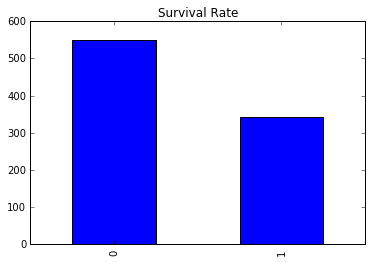

In [18]:
df.Survived.value_counts().plot(kind='bar',title="Survival Rate")

## Passenger Class

In [19]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

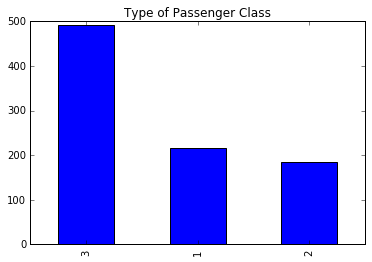

In [20]:
df.Pclass.value_counts().plot(kind='bar', title='Type of Passenger Class')

## Passenger Sex Ratio

In [21]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

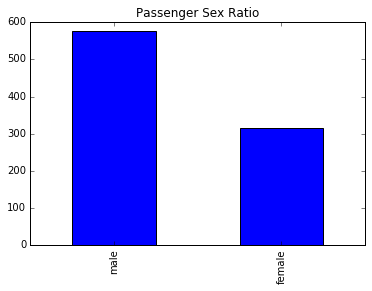

In [22]:
df.Sex.value_counts().plot(kind='bar', title="Passenger Sex Ratio")

## Passenger survival By Gender

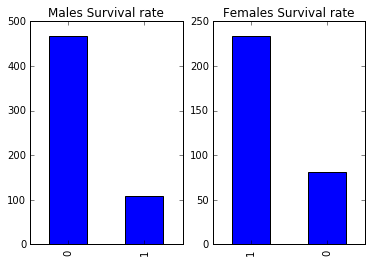

In [78]:
fig , axs = plt.subplots(1,2)

df[df.Sex=='male'].Survived.value_counts().plot(kind = 'bar', ax=axs[0], title="Males Survival rate")
df[df.Sex=='female'].Survived.value_counts().plot(kind = 'bar', ax=axs[1], title="Females Survival rate")

## Passenger survival by class

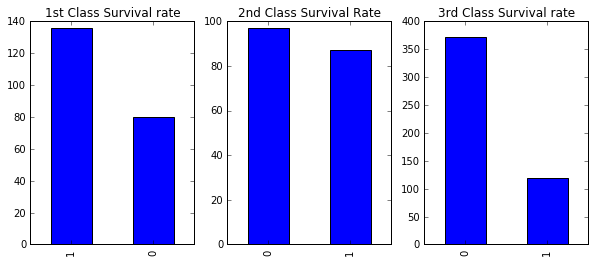

In [79]:
fig , axs = plt.subplots(ncols=3, figsize=(10,4)) ## changed a little as graphs were overlapping.

df[df.Pclass==1].Survived.value_counts().plot(kind = 'bar', ax=axs[0], title="1st Class Survival rate")
df[df.Pclass==2].Survived.value_counts().plot(kind = 'bar', ax=axs[1], title="2nd Class Survival Rate")
df[df.Pclass==3].Survived.value_counts().plot(kind = 'bar', ax=axs[2], title="3rd Class Survival rate")

## Passenger Age

In [45]:
df[df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Age Averages

In [47]:
df.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

### Replacing The NaNs by average passenger age

In [25]:
avg_Age = df.Age.mean()
## Not really a proper way. But I couldn't think of any other way. I guess it is bettr than discarding the NaN values

In [26]:
avg_Age

29.69911764705882

In [27]:
df.Age=df.Age.fillna(value=avg_Age)

In [28]:
df[df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


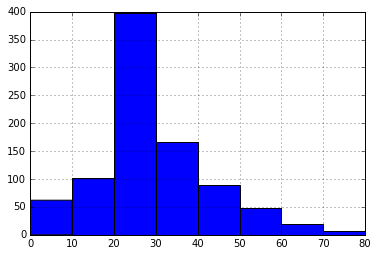

In [29]:
df.Age.hist(bins=8,range=(0,80))

## Passenger Having Siblings or Spouses

In [30]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

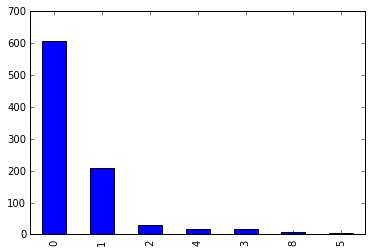

In [31]:
df.SibSp.value_counts().plot(kind="bar")

## Passengers having Parents or Children

In [32]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

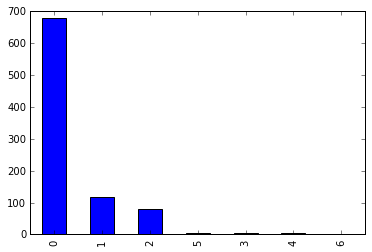

In [54]:
df.Parch.value_counts().plot(kind="bar")

## Passenger Travelling Alone

The '0' value in above two graphs only specify that the passeneres did not have any Spouse or Sibling, Or did not have any Children/ Parents. They do not Tell who were travelling alone. 

I have sliced the df accordingly to show the passengers travelling alone

In [75]:
#Calculation of Passenger travelling Alone 
df[(df.SibSp == 0)  & (df.Parch == 0)].PassengerId.count()

537

## Passenger travelling Alone Survival Rate

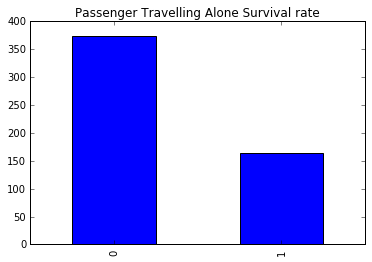

In [70]:
df[(df.SibSp == 0)  & (df.Parch == 0)].Survived.value_counts().plot(kind='bar', title="Passenger Travelling Alone Survival rate")

## Amount of Fares paid

In [34]:
df[df.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [35]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

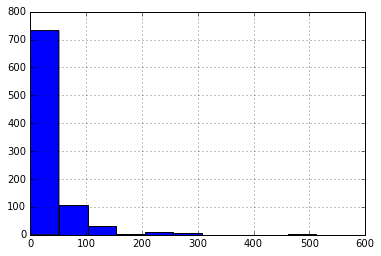

In [36]:
df.Fare.hist(bins=10)

## Embarkment Sites

In [37]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

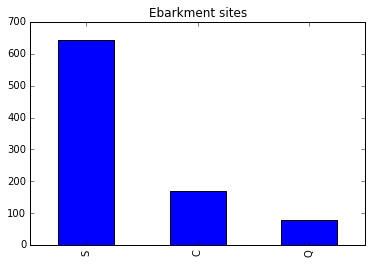

In [76]:
df.Embarked.value_counts().plot(kind='bar',title="Ebarkment sites")

## Notable Conclusions

I have given various descriptions wherever I have plotted Graphs. But following are some Notable Conclusions

* Survival rate of women and children is high.
* As women and children were saved first. The survival Rate of Men is low.
* The survival rate of 3rd Class passengers is low.
* 537 Passengers were Travelling Alone.

Note: I have not calculated the children's survival rate as I found out that after entering average values for the NaN in the age field, quite a lot of people with name suffix 'Master' and 'Miss' were given age of the 29.7 (The average) but they had siblings and parents travelling with them. 
Thus the calculation of survival rate of children wouldn't have been accurate.

The Conclusion which I made about the children was derived from the internet as Titinaic Sinkage is quite a famous incident. 

## Not so useful data

The Cabin data of most of the passengers were not available, so nothing could be derived from it.

The ticket data of passengers appeared quiet Random with no  major significance